In [13]:
import numpy as np
import pandas as pd

In [14]:
rio = pd.read_csv("RioDeJaneiro.csv")
#rio.head()
caxias = pd.read_csv("Caxias.csv")
#caxias.head()
ni = pd.read_csv("NovaIguacu.csv")
#ni.head()
sj = pd.read_csv("SJMeriti.csv")
#sj.head()
brx = pd.read_csv("BelfordRoxo.csv")
#brx.head()
sgc = pd.read_csv("SaoGonca.csv")
#sgc.head()
nit = pd.read_csv("Niteroi.csv")
#nit.head()
nil = pd.read_csv("Nilopolis.csv")
#nil.head()
mes = pd.read_csv("Mesquita.csv")
#mes.head()
qmd = pd.read_csv("Queimados.csv")
#qmd.head()

In [15]:
def retornaPdCovid(cidades):
    RegMetropolitana = pd.DataFrame(rio["new_deaths"] + caxias["new_deaths"] + ni["new_deaths"] + nil["new_deaths"] + nit["new_deaths"] + sj["new_deaths"] + brx["new_deaths"] + sgc["new_deaths"] + mes["new_deaths"] + qmd["new_deaths"])
    RegMetropolitana["media_movel_mortes"] = RegMetropolitana["new_deaths"].rolling(window=7).mean()
    RegMetropolitana["DataDia"] = pd.to_datetime(rio["date"])
    RegMetropolitana.set_index('DataDia', inplace=True)
    print(RegMetropolitana.info())
    return RegMetropolitana

RegMetropolitana = retornaPdCovid([rio, caxias, ni, nil, nit, sj, brx, sgc, mes, qmd])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2020-08-12 to 2020-03-06
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   new_deaths          132 non-null    float64
 1   media_movel_mortes  126 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB
None


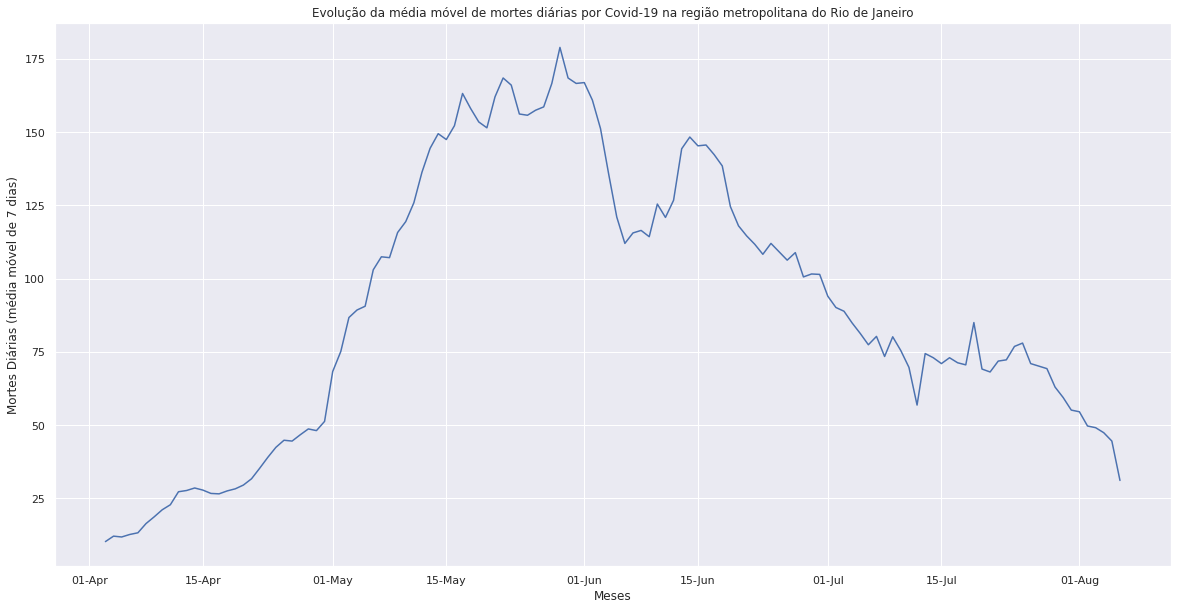

In [16]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

plt.figure(figsize=(20,10))

ax = sns.lineplot(data=RegMetropolitana["media_movel_mortes"])

# Definir título e descrição para os eixos
ax.set(xlabel="Meses",
       ylabel="Mortes Diárias (média móvel de 7 dias)",
       title="Evolução da média móvel de mortes diárias por Covid-19 na região metropolitana do Rio de Janeiro")

# Definir formato para as datas
date_form = DateFormatter("%d-%b")
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_form)

# Definir separador nos dias 1 e 15 de cada mês
ax.xaxis.set_major_locator(mdates.DayLocator([1, 15]))